In [15]:
# Please view this case as you are a data analytics group that has been hired by the school's Principal to give feedback on how to improve their school. The Principal knows there is room for growth, but is unsure what the outliers and trends are for students, teachers, and content. You are tasked to give the Principal a 1 sheet analysis (2 pages) of your observations of where the school stands and what focal points the Principal should take before the third test occuring in the Spring. The topic is purposefully ambiguous as this Principal does not have experience with data analytics, but knows it is important to do on student testing data and has hired you to "figure out the problem". You will be judged on your accuracy of analytics, clarity in presenting the findings in an easily digestible format, and tactical strategy behind your recommendations. A full rubric is attached.


# outliers and trends are for students, teachers, and content. 
# where the school stands and what focal points the Principal should take before the third test occuring in the Spring.

In [42]:
# importing pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [43]:
# Pandas dataframes for three sheets of data (Cohorts, Fall Raw, Winter Raw)
cohorts = pd.read_csv("cohorts.csv")
fall_raw = pd.read_csv("fall_raw.csv")
winter_raw = pd.read_csv("winter_raw.csv")

In [44]:
# data cleaning - removing students who have withdrawn from school
fall_raw = fall_raw[fall_raw["Name"].isin(cohorts["Name"])]
winter_raw = winter_raw[winter_raw["Name"].isin(cohorts["Name"])]

In [88]:
metGrowthYes = winter_raw[winter_raw["FallToWinterMetProjectedGrowth"] == 'Yes']
metGrowthYesStar = winter_raw[winter_raw["FallToWinterMetProjectedGrowth"] == 'Yes*']

metGrowthNo = winter_raw[winter_raw["FallToWinterMetProjectedGrowth"] == 'No']
metGrowthNoStar = winter_raw[winter_raw["FallToWinterMetProjectedGrowth"] == 'No*']

yes = len(metGrowthYes) + len(metGrowthYesStar)
no = len(metGrowthNo) + len(metGrowthNoStar)
total = yes + no

print("Percentage of Students Meeting Projected Growth: " + "{:.2%}".format(yes/total))
print("Percentage of Students Missing Projected Growth: " + "{:.2%}".format(no/total))
print()
print("Conclusion: More than half of student population did not hit projected growth from fall to winter!")


Percentage of Students Meeting Projected Growth: 46.82%
Percentage of Students Missing Projected Growth: 53.18%

Conclusion: More than half of student population did not hit projected growth from fall to winter!


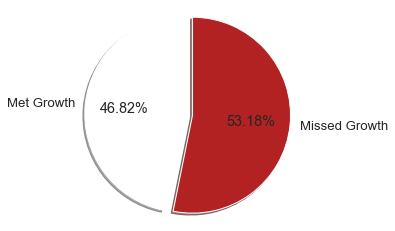

In [48]:

# Pie chart depiction of Students Missing Growth


labels = 'Met Growth', 'Missed Growth'
sizes = [46.82, 53.18]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
#sns.set(font='Arial', font_['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']scale=1.2)
matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'serif']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90, colors=['white','firebrick'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [6]:
fall_duration_mean = fall_raw['Duration'].mean()
fall_rit_mean = fall_raw['RITScore'].mean()

winter_duration_mean = winter_raw['Duration'].mean()
winter_rit_mean = winter_raw['RITScore'].mean()

print("Fall-> " + "Mean Duration: " + str(fall_duration_mean) + " ----- Mean Score: " + str(fall_rit_mean))
print("Winter-> " + "Mean Duration: " + str(winter_duration_mean) + " ----- Mean Score: " + str(winter_rit_mean))

Fall-> Mean Duration: 85.08315098468272 ----- Mean Score: 208.45951859956236
Winter-> Mean Duration: 111.48913043478261 ----- Mean Score: 211.79565217391306


In [7]:
# There is a positive correlation (0.41) between Duration and RITScore, indicating that on average,
# the more time a student spends on the test, their scores tend to be higher. 
fall_raw.corr()

,Duration,RITScore,Perecentile,FallToFallProjectedGrowth,FallToFallObservedGrowth,FallToFallConditionalGrowthPercentile,Goal1RitScore,Goal2RitScore,Goal3RitScore,Goal4RitScore,Goal5RitScore,PercentCorrect
Duration,1.000000,0.406177,0.412000,-0.160206,0.212562,0.252571,0.384296,0.353068,0.383581,0.396885,0.395458,0.244363
RITScore,0.406177,1.000000,0.925160,-0.143669,0.340916,0.401471,0.921095,0.911541,0.919192,0.918020,0.895558,0.578995
Perecentile,0.412000,0.925160,1.000000,-0.356026,0.261510,0.347393,0.849927,0.830317,0.841482,0.880814,0.836905,0.505155
FallToFallProjectedGrowth,-0.160206,-0.143669,-0.356026,1.000000,0.397280,0.250942,-0.116490,-0.036825,-0.098905,-0.264265,-0.748847,-0.193346
FallToFallObservedGrowth,0.212562,0.340916,0.261510,0.397280,1.000000,0.947421,0.296153,0.352286,0.336220,0.289062,0.152955,0.151211
FallToFallConditionalGrowthPercentile,0.252571,0.401471,0.347393,0.250942,0.947421,1.000000,0.343587,0.399446,0.381462,0.369494,0.276792,0.219609
Goal1RitScore,0.384296,0.921095,0.849927,-0.116490,0.296153,0.343587,1.000000,0.797479,0.796365,0.812223,0.772424,0.543693
Goal2RitScore,0.353068,0.911541,0.830317,-0.036825,0.352286,0.399446,0.797479,1.000000,0.788926,0.785057,0.778982,0.481297
Goal3RitScore,0.383581,0.919192,0.841482,-0.098905,0.336220,0.381462,0.796365,0.788926,1.000000,0.808200,0.765816,0.545586
Goal4RitScore,0.396885,0.918020,0.880814,-0.264265,0.289062,0.369494,0.812223,0.785057,0.808200,1.000000,0.759928,0.558864


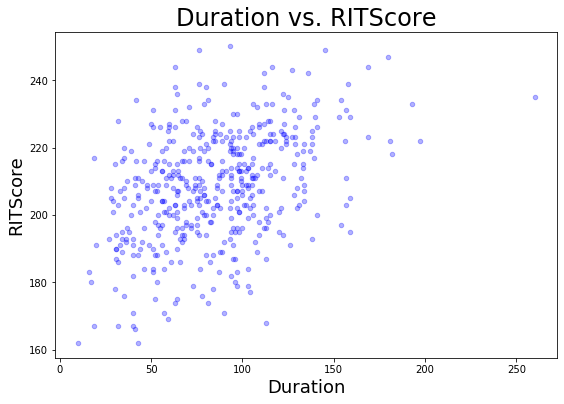

In [8]:
# Scatter plot and regression line showing tendency of higher scores based on more time spent taking test

fall_raw.plot(kind='scatter', x='Duration',y='RITScore', color='blue',alpha=0.3, figsize=(9,6))

x = fall_raw['Duration']
y = fall_raw['RITScore']

# title, xlabel, and ylabel
plt.title('Duration vs. RITScore', size=24)
plt.xlabel('Duration', size=18)
plt.ylabel('RITScore', size=18);

In [9]:
# average scores in Math vs average scores in Reading
# Fall Raw

fall_math = fall_raw[fall_raw.Content == 'Mathematics']
fall_math_mean =  fall_math.RITScore.mean()

fall_reading = fall_raw[fall_raw.Content == 'Reading']
fall_reading_mean =  fall_reading.RITScore.mean()

# Winter Raw
winter_math = winter_raw[winter_raw.Content == 'Mathematics']
winter_math_mean =  winter_math.RITScore.mean()

winter_reading = winter_raw[winter_raw.Content == 'Reading']
winter_reading_mean =  winter_reading.RITScore.mean()

print("Math Means -> " + str(fall_math_mean) + "->" + str(winter_math_mean))
print("Reading Means -> " + str(fall_reading_mean) + "->" + str(winter_reading_mean))
print()
print("Conclusion: Average scores for reading are slightly less than average scores for math.")


Math Means -> 211.14473684210526->213.9301310043668
Reading Means -> 205.78602620087335->209.7391304347826

Conclusion: Average scores for reading are slightly less than average scores for math.


In [14]:
# Function to create graph

def graph_math_goals(title, goal_num):
    fall_math = fall_raw[fall_raw.Content  == "Mathematics"]
    df_1 = fall_math["Goal"+ str(goal_num) + "Adjective"]
    sns.set(font='Georgia', font_scale=1.2)
    df_1.value_counts().plot(kind='barh', figsize=(8,6), rot=0, color=['firebrick', 'sandybrown', 'gold', 'limegreen', 'royalblue'])
    plt.xlabel("Number of Students", labelpad=14)
    plt.ylabel("Level", labelpad=8)
    plt.title(title, size=18);




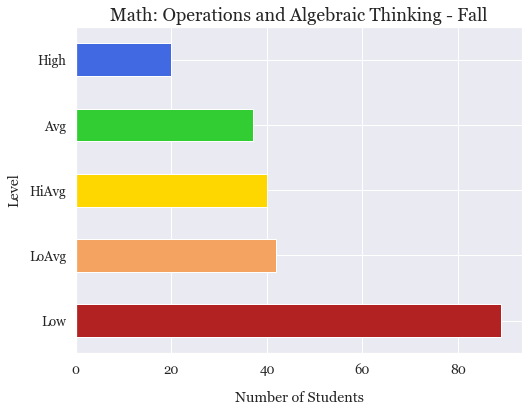

In [10]:
# Average Scores in each topic (Goal) - we will exammine the GoalXAdjective and graph to see adjective distribution

# Math: Operations and Algebraic Thinking, The Real and Complex Number Systems, Geometry, Statistics and Probability, NaN

# Reading: Literary Text: Key Ideas and Details, Literary Text: Language, Craft, and Structure, Informational Text: Key Ideas # and Details, Informational Text: Language, Craft, and Structure


# FALL_RAW MATH
fall_math = fall_raw[fall_raw.Content  == "Mathematics"]
df_1 = fall_math["Goal1Adjective"]
sns.set(font='Georgia', font_scale=1.2)
df_1.value_counts().plot(kind='barh', figsize=(8,6), rot=0, color=['firebrick', 'sandybrown', 'gold', 'limegreen', 'royalblue'])
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Level", labelpad=8)
plt.title("Math: Operations and Algebraic Thinking - Fall", size=18);


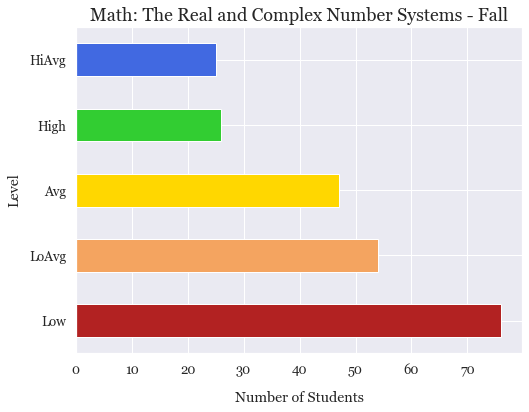

In [11]:
df_2 = fall_math["Goal2Adjective"]
sns.set(font='Georgia', font_scale=1.2)
df_2.value_counts().plot(kind='barh', figsize=(8,6), rot=0, color=['firebrick', 'sandybrown', 'gold', 'limegreen', 'royalblue'])
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Level", labelpad=8)
plt.title("Math: The Real and Complex Number Systems - Fall", size=18);


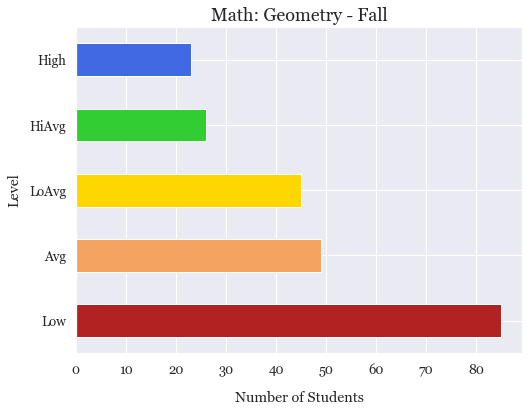

In [12]:
df_3 = fall_math["Goal3Adjective"]
sns.set(font='Georgia', font_scale=1.2)
df_3.value_counts().plot(kind='barh', figsize=(8,6), rot=0, color=['firebrick', 'sandybrown', 'gold', 'limegreen', 'royalblue'])
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Level", labelpad=8)
plt.title("Math: Geometry - Fall", size=18);

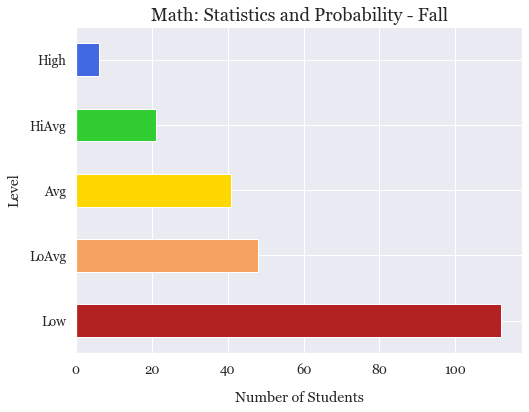

In [13]:
df_4 = fall_math["Goal4Adjective"]
sns.set(font='Georgia', font_scale=1.2)
df_4.value_counts().plot(kind='barh', figsize=(8,6), rot=0, color=['firebrick', 'sandybrown', 'gold', 'limegreen', 'royalblue'])
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Level", labelpad=8)
plt.title("Math: Statistics and Probability - Fall", size=18);

In [58]:
# Analyzing percentage of students performing below average in Statistics and Probability (Fall)
print(df_4.value_counts())
print()
total = df_4.count()
print((112+48)/total)

Low      112
LoAvg     48
Avg       41
HiAvg     21
High       6
Name: Goal4Adjective, dtype: int64

0.7017543859649122


In [63]:
# Identical analysis for Statistics and Probability in the Winter
winter_math = winter_raw[winter_raw.Content  == "Mathematics"]
df_4w = winter_math["Goal4Adjective"]

print(df_4w.value_counts())
print()
total = df_4w.count()
print((112+53)/total)

Low      112
LoAvg     53
Avg       38
HiAvg     18
High       8
Name: Goal4Adjective, dtype: int64

0.7205240174672489


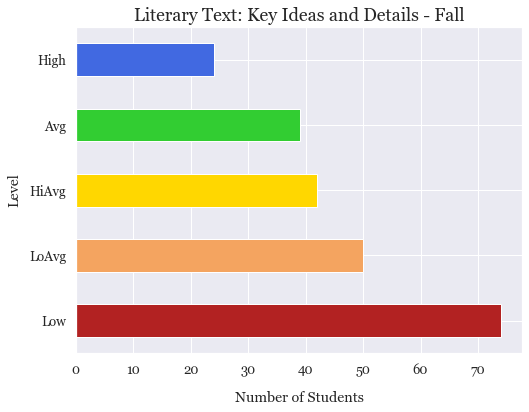

In [64]:

# Reading: Literary Text: Key Ideas and Details, Literary Text: Language, Craft, and Structure, Informational Text: Key Ideas # and Details, Informational Text: Language, Craft, and Structure


fall_reading = fall_raw[fall_raw.Content  == "Reading"]
df_1 = fall_reading["Goal1Adjective"]
sns.set(font='Georgia', font_scale=1.2)
df_1.value_counts().plot(kind='barh', figsize=(8,6), rot=0, color=['firebrick', 'sandybrown', 'gold', 'limegreen', 'royalblue'])
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Level", labelpad=8)
plt.title("Literary Text: Key Ideas and Details - Fall", size=18);

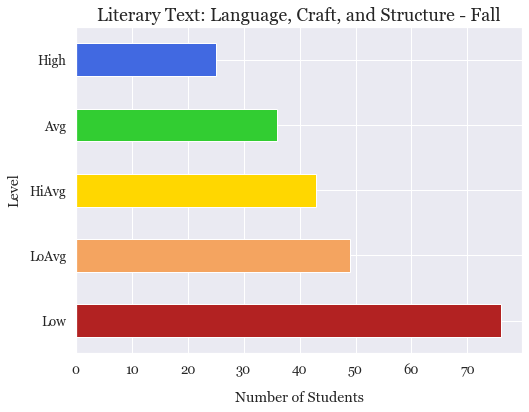

In [66]:
df_2 = fall_reading["Goal2Adjective"]
sns.set(font='Georgia', font_scale=1.2)
df_2.value_counts().plot(kind='barh', figsize=(8,6), rot=0, color=['firebrick', 'sandybrown', 'gold', 'limegreen', 'royalblue'])
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Level", labelpad=8)
plt.title("Literary Text: Language, Craft, and Structure - Fall", size=18);

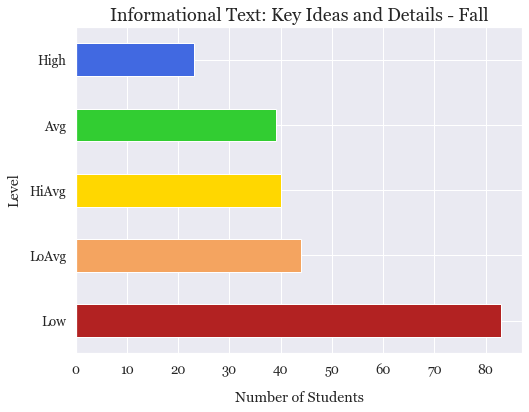

In [67]:
df_3 = fall_reading["Goal3Adjective"]
sns.set(font='Georgia', font_scale=1.2)
df_3.value_counts().plot(kind='barh', figsize=(8,6), rot=0, color=['firebrick', 'sandybrown', 'gold', 'limegreen', 'royalblue'])
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Level", labelpad=8)
plt.title("Informational Text: Key Ideas and Details - Fall", size=18);

In [73]:
# Analyzing percentage of students performing below average in Reading: Informational Text Key Ideas and Details
print(df_3.value_counts())
print()
total = df_3.count()
print((83+44)/total)

Low      83
LoAvg    44
HiAvg    40
Avg      39
High     23
Name: Goal3Adjective, dtype: int64

0.5545851528384279


In [79]:
# Identical analysis for Winter
winter_reading = winter_raw[winter_raw.Content  == "Reading"]
df_3w = winter_reading["Goal3Adjective"]
print(df_3w.value_counts())
print()
total = df_3w.count()
print((72+46)/total)

Low      72
Avg      50
LoAvg    46
HiAvg    40
High     22
Name: Goal3Adjective, dtype: int64

0.5130434782608696


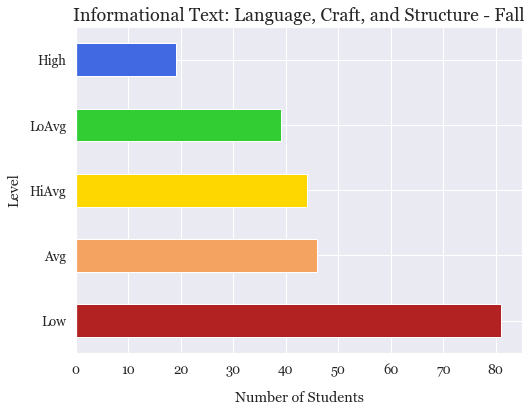

In [68]:
df_4 = fall_reading["Goal4Adjective"]
sns.set(font='Georgia', font_scale=1.2)
df_4.value_counts().plot(kind='barh', figsize=(8,6), rot=0, color=['firebrick', 'sandybrown', 'gold', 'limegreen', 'royalblue'])
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Level", labelpad=8)
plt.title("Informational Text: Language, Craft, and Structure - Fall", size=18);

In [87]:
# Identical analysis for Winter
df_1w = winter_reading["Goal1Adjective"]
print(df_1w.value_counts())
print()
total = df_1w.count()
print((66+56)/total)

Low      66
LoAvg    56
Avg      49
HiAvg    31
High     28
Name: Goal1Adjective, dtype: int64

0.5304347826086957


In [83]:
# Identical analysis for Winter
winter_reading = winter_raw[winter_raw.Content  == "Reading"]
df_2w = winter_reading["Goal2Adjective"]
print(df_2w.value_counts())
print()
total = df_2w.count()
print((66+52)/total)

Low      66
LoAvg    52
Avg      50
HiAvg    41
High     21
Name: Goal2Adjective, dtype: int64

0.5130434782608696


In [84]:
# Identical analysis for Winter
winter_reading = winter_raw[winter_raw.Content  == "Reading"]
df_3w = winter_reading["Goal3Adjective"]
print(df_3w.value_counts())
print()
total = df_3w.count()
print((72+46)/total)

Low      72
Avg      50
LoAvg    46
HiAvg    40
High     22
Name: Goal3Adjective, dtype: int64

0.5130434782608696


In [86]:
# Identical analysis for Winter
winter_reading = winter_raw[winter_raw.Content  == "Reading"]
df_4w = winter_reading["Goal4Adjective"]
print(df_4w.value_counts())
print()
total = df_4w.count()
print((71+48)/total)

Low      71
LoAvg    48
Avg      47
HiAvg    39
High     25
Name: Goal4Adjective, dtype: int64

0.5173913043478261


In [125]:
# Answering key question -> Do students struggle more in math or reading?

# Let's take a look at the average RIT Scores in Reading and in Math from the fall_raw dataset

fall_math = fall_raw[fall_raw.Content == "Mathematics"]
a = fall_math_low = fall_math[fall_math.Goal1Adjective == "Low"]
b = fall_math_lowavg = fall_math[fall_math.Goal1Adjective == "LowAvg"]

c = fall_math_low2 = fall_math[fall_math.Goal2Adjective == "Low"]
d = fall_math_lowavg2 = fall_math[fall_math.Goal2Adjective == "LowAvg"]

e = fall_math_low3 = fall_math[fall_math.Goal3Adjective == "Low"]
f = fall_math_lowavg3 = fall_math[fall_math.Goal3Adjective == "LowAvg"]

g = fall_math_low4 = fall_math[fall_math.Goal4Adjective == "Low"]
h = fall_math_lowavg4 = fall_math[fall_math.Goal4Adjective == "LowAvg"]

total = len(fall_math) * 4
below_average = len(a) + len(b) + len(c) + len(d) + len(e) + len(f) + len(g) + len(h)
fall_math_below_average = below_average/total
print(fall_math_below_average)
print("Conclusion: 39.7% of students scored below average in math!")

0.3969298245614035
Conclusion: 39.7% of students scored below average in math!


In [128]:
# Identical analysis for reading
fall_reading = fall_raw[fall_raw.Content == "Reading"]
a = fall_reading_low = fall_reading[fall_reading.Goal1Adjective == "Low"]
b = fall_reading_lowavg = fall_reading[fall_reading.Goal1Adjective == "LowAvg"]

c = fall_reading_low2 = fall_reading[fall_reading.Goal2Adjective == "Low"]
d = fall_reading_lowavg2 = fall_reading[fall_reading.Goal2Adjective == "LowAvg"]

e = fall_reading_low3 = fall_reading[fall_reading.Goal3Adjective == "Low"]
f = fall_reading_lowavg3 = fall_reading[fall_reading.Goal3Adjective == "LowAvg"]

g = fall_reading_low4 = fall_reading[fall_reading.Goal4Adjective == "Low"]
h = fall_reading_lowavg4 = fall_reading[fall_reading.Goal4Adjective == "LowAvg"]

total = len(fall_reading) * 4
below_average = len(a) + len(b) + len(c) + len(d) + len(e) + len(f) + len(g) + len(h)
fall_reading_below_average = below_average/total
print(fall_reading_below_average)
print("Conclusion: 34.3% of students scored below average in reading!")

0.34279475982532753
Conclusion: 34.3% of students scored below average in reading!
